In [2]:
import tensorflow as tf
tf.__version__

'2.8.0'

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
MNIST_SHAPE = (28, 28, 1)  # not including the batch dimention
FILTERS = [32, 64, 128]
DENSES = [10]

In [7]:
inputs = keras.Input(shape=MNIST_SHAPE)
x = layers.Conv2D(filters=FILTERS[0], kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(filters=FILTERS[1], kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(filters=FILTERS[2], kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(units=10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 128)         7385

In [10]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [14]:
train_images = train_images.reshape((60000, 28, 28, 1))  # original : (60000, 28, 28)
train_images = train_images.astype("float32") / 255      # original : "uint8"
test_images = test_images.reshape((10000, 28, 28, 1))    # original : (10000, 28, 28)
test_images = test_images.astype("float32") / 255        # original : "uint8"

In [15]:
model.compile(optimizer='rmsprop',  
              loss='sparse_categorical_crossentropy', 
              metrics=["accuracy"])

In [16]:
model.fit(x=train_images, y=train_labels, batch_size=64, epochs=10)  # n_samples = n_each_epoch * batch_size

Epoch 1/10
938/938 [==============================] - 13s 4ms/step - loss: 0.1578 - accuracy: 0.9517
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0450 - accuracy: 0.9864
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0316 - accuracy: 0.9901
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0234 - accuracy: 0.9926
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0189 - accuracy: 0.9943
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0145 - accuracy: 0.9955
Epoch 7/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0115 - accuracy: 0.9965
Epoch 8/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0102 - accuracy: 0.9970
Epoch 9/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0079 - accuracy: 0.9977
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0069 - accuracy: 0.998

In [18]:
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9910
0.9909999966621399


In [24]:
test_images[0].shape

(28, 28, 1)

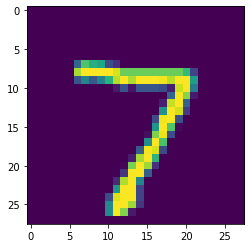

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(test_images[0].reshape((28, 28)))

In [31]:
predict_result_1 = model.predict(test_images[0].reshape((1, 28, 28, 1)))

In [32]:
import numpy as np
predict_result_1_final = np.argmax(predict_result_1)
predict_result_1_final

7